In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("musk_csv.csv")
data.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [4]:
data.shape

(6598, 170)

So there are 170 features and 6598 datapoints

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6598 entries, 0 to 6597
Columns: 170 entries, ID to class
dtypes: int64(168), object(2)
memory usage: 8.6+ MB


In [6]:
data.isna().sum()

ID                   0
molecule_name        0
conformation_name    0
f1                   0
f2                   0
                    ..
f163                 0
f164                 0
f165                 0
f166                 0
class                0
Length: 170, dtype: int64

In [7]:
data.isna().sum().sum()

0

There are no missing values in this dataset, so we can proceed futher

In [8]:
data['class'].unique()

array([1, 0], dtype=int64)

This is a binary classification problem, here:
- 1=MUSK
- 0=NON-MUSK

In [9]:
data.drop(['molecule_name','conformation_name'],1,inplace=True)

These 2 columns contain the data that we shouldn't access because it directly tells the class which can lead to the **data leakage**. At the time of prediction on real data we won't have access to this data but only features.

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
df_train,df_test=train_test_split(data,test_size=0.2,random_state=100)
print(df_train.shape)
print(df_test.shape)

(5278, 168)
(1320, 168)


Splitting the data into 2 datasets with 80-20 ratio, one for training and one for testing the trained model

In [13]:
X_train=df_train.drop(['ID','class'],1)
y_train=df_train['class']
print(X_train.shape)
print(y_train.shape)

(5278, 166)
(5278,)


In [14]:
X_test=df_test.drop(['ID','class'],1)
y_test=df_test['class']
print(X_test.shape)
print(y_test.shape)

(1320, 166)
(1320,)


In [12]:
from sklearn.preprocessing import StandardScaler

Scaling the data for better understanding

In [15]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train[X_train.columns])
X_train_scaled

array([[-1.41108987e-01,  1.54536383e-02,  7.68272217e-01, ...,
         3.69647386e-02,  4.63225961e-01,  7.58372661e-01],
       [-2.73641021e-01,  2.27622732e+00,  1.28468233e+00, ...,
        -3.36313113e-01,  4.44700096e-02, -5.55169354e-01],
       [-1.03242691e-01,  1.54536383e-02,  1.04860914e+00, ...,
         9.02901460e-02,  4.63225961e-01,  8.96082711e-01],
       ...,
       [-1.04990008e+00, -8.00630519e-01, -7.95712707e-01, ...,
        -8.74612119e-02,  5.28656579e-01,  3.34649431e-01],
       [-3.11507316e-01,  6.55087167e-01,  1.47649181e+00, ...,
        -3.71863385e-01, -2.30338584e-01, -6.29320920e-01],
       [-4.06173055e-01,  1.01901659e+00,  5.91217320e-01, ...,
         1.41446704e-03, -3.48113695e-01,  1.11853741e+00]])

In [17]:
X_train_scaled.shape

(5278, 166)

In [16]:
X_test_scaled=scaler.transform(X_test[X_test.columns])
X_test_scaled

array([[-0.19790843, -0.73446153, -1.04654048, ..., -0.44296393,
        -0.28268308, -0.29034233],
       [-0.4629725 , -0.84474318, -0.81046728, ..., -0.44296393,
        -1.1332811 , -0.59754168],
       [-0.27364102,  0.19190427,  0.79778137, ..., -0.33631311,
         0.08372838, -0.49161087],
       ...,
       [-0.21684158,  0.16984794,  0.17808923, ..., -0.0341358 ,
         0.41088147,  0.64184877],
       [-0.4251062 , -0.26025047, -1.00227675, ..., -0.10523635,
        -0.03404673,  0.83252423],
       [-0.25470787,  0.37938306,  0.14858008, ..., -0.31853798,
         0.13607287, -0.44923855]])

In [18]:
X_test_scaled.shape

(1320, 166)

In [157]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras import regularizers

In [167]:
model=Sequential()
model.add(Dense(45,input_dim=166,activation='relu'))
model.add(Dense(35,activation='relu'))
model.add(Dense(21,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [168]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [169]:
m1=model.fit(X_train_scaled,y_train,epochs=10,batch_size=200,validation_data=(X_test_scaled,y_test))

Epoch 1/10
27/27 [==============================] - 0s 12ms/step - loss: 0.4772 - accuracy: 0.7939 - val_loss: 0.3364 - val_accuracy: 0.8576
Epoch 2/10
27/27 [==============================] - 0s 3ms/step - loss: 0.2871 - accuracy: 0.8822 - val_loss: 0.2282 - val_accuracy: 0.9152
Epoch 3/10
27/27 [==============================] - 0s 7ms/step - loss: 0.1986 - accuracy: 0.9269 - val_loss: 0.1643 - val_accuracy: 0.9379
Epoch 4/10
27/27 [==============================] - 0s 5ms/step - loss: 0.1479 - accuracy: 0.9433 - val_loss: 0.1347 - val_accuracy: 0.9470
Epoch 5/10
27/27 [==============================] - 0s 7ms/step - loss: 0.1181 - accuracy: 0.9530 - val_loss: 0.1133 - val_accuracy: 0.9561
Epoch 6/10
27/27 [==============================] - 0s 5ms/step - loss: 0.0947 - accuracy: 0.9672 - val_loss: 0.0980 - val_accuracy: 0.9629
Epoch 7/10
27/27 [==============================] - 0s 8ms/step - loss: 0.0768 - accuracy: 0.9729 - val_loss: 0.0896 - val_accuracy: 0.9667
Epoch 8/10
27/27 [=

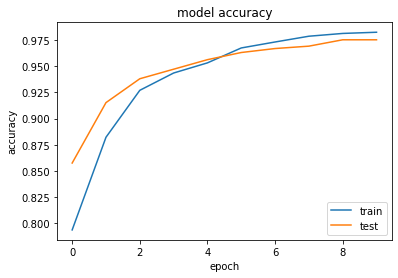

In [170]:
plt.plot(m1.history['accuracy'])
plt.plot(m1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="lower right")
plt.show()

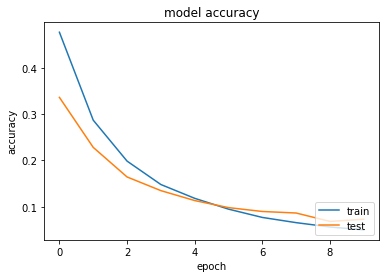

In [171]:
plt.plot(m1.history['loss'])
plt.plot(m1.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="lower right")
plt.show()

In [185]:
score_test=model.evaluate(X_test_scaled,y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1],score_test[1]*100))

42/42 [==============================] - 0s 900us/step - loss: 0.0728 - accuracy: 0.9750

accuracy: 97.50%


**validation accuracy**: 97.50%\
**validation loss**: 0.072

In [172]:
from sklearn.metrics import confusion_matrix

In [173]:
y_pred=model.predict(X_test_scaled)

### Evaluation on test data

In [181]:
# confusion matrix
cm=confusion_matrix(y_pred.round(),y_test)

In [182]:
cm

array([[1122,   27],
       [   6,  165]], dtype=int64)

**confusion matrix**-\
[1122,   27]\
[   6,  165]

In [183]:
TN=cm[0][0] # true negative
FP=cm[0][1] # false positive
FN=cm[1][0] # false negative
TP=cm[1][1] # True postitive

#### precision
precision=TP/(TP+FP)

In [186]:
precision=TP/(TP+FP)
precision

0.859375

**precision**:0.859

#### Recall
Recall=TP/(TP+FN)

In [187]:
recall=TP/(TP+FN)
recall

0.9649122807017544

**Recall**:0.964

#### F1 score
f1 score=2*((precision x recall)/(precision+recall))

In [188]:
f1_score=2*((precision*recall)/(precision+recall))
f1_score

0.9090909090909092

**f1 score**:0.90